In [32]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
from preprocessing_helper import save_pickle, normalization, normalization_move

In [33]:
cwd = os.getcwd()
parent_wd = cwd.replace('/preprocessing', '')
processed_xy_path = parent_wd + '/preprocessing/processed_data_xy_mode'

In [34]:
with open(processed_xy_path, 'rb') as f:
    output_xy_mode_read = pickle.load(f)

In [35]:
url_data_path = parent_wd + '/raw_data/moonGen_scrape_2016_cp'

In [36]:
with open(url_data_path, 'rb') as f:
    MoonBoard_2016_withurl = pickle.load(f)

## assign train/dev/test set

In [37]:
n_benchmark_withgrade = len(output_xy_mode_read['X_dict_benchmark_withgrade'])
n_benchmark_nograde = len(output_xy_mode_read['X_dict_benchmark_nograde'])
n_withgrade = len(output_xy_mode_read['X_dict_withgrade'])
n_nograde = len(output_xy_mode_read['X_dict_nograde'])
print('Number of benchmarked samples with user grade = %s' %n_benchmark_withgrade)
print('Number of benchmarked samples without user grade = %s' %n_benchmark_nograde)
print('Number of non-benchmarked samples with user grade = %s' %n_withgrade)
print('Number of non-benchmarked samples without user grade = %s' %n_nograde)

Number of benchmarked samples with user grade = 358
Number of benchmarked samples without user grade = 9
Number of non-benchmarked samples with user grade = 8607
Number of non-benchmarked samples without user grade = 21660


In [38]:
X_dict_usergrade_merge = {**output_xy_mode_read['X_dict_benchmark_withgrade'] , **output_xy_mode_read['X_dict_withgrade']}
Y_dict_usergrade_merge = {**output_xy_mode_read['Y_dict_benchmark_withgrade'] , **output_xy_mode_read['Y_dict_withgrade']}

In [39]:
X_dict_nograde_merge = {**output_xy_mode_read['X_dict_benchmark_nograde'] , **output_xy_mode_read['X_dict_nograde']}
Y_dict_nograde_merge = {**output_xy_mode_read['Y_dict_benchmark_nograde'] , **output_xy_mode_read['Y_dict_nograde']}

In [40]:
X_dict_merge = {**X_dict_usergrade_merge, **X_dict_nograde_merge}
Y_dict_merge = {**Y_dict_usergrade_merge, **Y_dict_nograde_merge}

In [41]:
n_sample = len(Y_dict_merge)
X_data_merge = np.zeros((n_sample, 30, 10))
Y_difficulties_merge = np.zeros(n_sample)
Y_isbenchmark_merge = np.zeros(n_sample)
keys_merge = []
tmax_merge = np.zeros(n_sample)

i = 0
for key, value in X_dict_merge.items():
    X_data = value.T
    X_data_merge[i, 0:X_data.shape[0], :] = X_data
    Y_difficulties_merge[i] = Y_dict_merge[key][0]
    Y_isbenchmark_merge[i] = Y_dict_merge[key][1]
    keys_merge.append(key)
    tmax_merge[i] = X_data.shape[0]
    i = i + 1

In [49]:
n_dev = 3000
n_test = 3000
n_train = n_sample - n_dev - n_test

In [53]:
shuffle = np.random.choice(np.arange(n_sample), n_sample, replace = False)

In [56]:
X_data_shuffle = X_data_merge[shuffle, :, :]
Y_difficulties_shuffle = Y_difficulties_merge[shuffle]
Y_isbenchmark_shuffle = Y_isbenchmark_merge[shuffle]
keys_shuffle = np.array(keys_merge)[shuffle]
tmax_shuffle = tmax_merge[shuffle]

In [59]:
training_set = {'X': X_data_shuffle[0:n_train], 
                'Y': Y_difficulties_shuffle[0:n_train], 
                'isbenchmark': Y_isbenchmark_shuffle[0:n_train], 
                'keys': keys_shuffle[0:n_train], 
                'tmax': tmax_shuffle[0:n_train]}
dev_set = {'X': X_data_shuffle[n_train:n_train+n_dev], 
                'Y': Y_difficulties_shuffle[n_train:n_train+n_dev], 
                'isbenchmark': Y_isbenchmark_shuffle[n_train:n_train+n_dev], 
                'keys': keys_shuffle[n_train:n_train+n_dev], 
                'tmax': tmax_shuffle[n_train:n_train+n_dev]}
test_set = {'X': X_data_shuffle[n_train+n_dev:], 
                'Y': Y_difficulties_shuffle[n_train+n_dev:], 
                'isbenchmark': Y_isbenchmark_shuffle[n_train+n_dev:], 
                'keys': keys_shuffle[n_train+n_dev:], 
                'tmax': tmax_shuffle[n_train+n_dev:]}

In [64]:
training_set_path = parent_wd + '/preprocessing/training_set'
dev_set_path = parent_wd + '/preprocessing/dev_set'
test_set_path = parent_wd + '/preprocessing/test_set'
save_pickle(training_set, training_set_path)
save_pickle(dev_set, dev_set_path)
save_pickle(test_set, test_set_path)

Text(0,0.5,'number count')

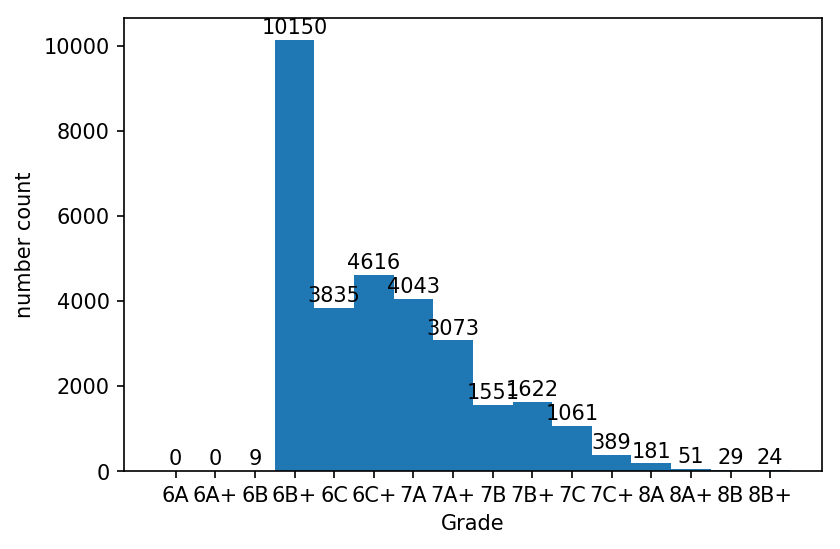

In [64]:
plt.figure(dpi = 150)
result = plt.hist(Y_difficulties_merge, bins = np.arange(17)-0.5)
for x,y in zip(np.arange(16),result[0]):

    label = str(int(y))

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='center')
plt.xticks(np.arange(16), ['6A','6A+','6B','6B+','6C','6C+','7A','7A+','7B','7B+','7C','7C+','8A','8A+','8B','8B+'])
plt.xlabel('Grade')
#plt.yscale('log')
plt.ylabel('number count')

## New sequence based data

In [63]:
fail_list = ['363336', 
             '363335', 
             '350368', 
             '349610', 
             '349049', 
             '348915', 
             '348858', 
             '348670', 
             '348669', 
             '348432', 
             '346738', 
             '344743', 
             '339916', 
             '339325', 
             '337916', 
             '335566', 
             '312004', 
             '310949', 
             '309657', 
             '309311', 
             '248997', 
             '246092', 
             '231401', 
             '231392', 
             '19362', '360322', '356219', '322560', '311585', '309230', '308089']

In [64]:
X_path_all = [cwd + '/benchmark_withgrade_move_seq_X', 
              cwd + '/benchmark_nograde_move_seq_X', 
              cwd + '/nonbenchmark_withgrade_move_seq_X', 
              cwd + '/nonbenchmark_nograde_move_seq_X']
Y_path_all = [cwd + '/benchmark_withgrade_move_seq_Y', 
              cwd + '/benchmark_nograde_move_seq_Y', 
              cwd + '/nonbenchmark_withgrade_move_seq_Y', 
              cwd + '/nonbenchmark_nograde_move_seq_Y']

In [65]:
X_seq_dict_merge = {}
Y_seq_dict_merge = {}
for path in X_path_all:
    with open(path, 'rb') as f:
        read_dict = pickle.load(f)
    X_seq_dict_merge = {**X_seq_dict_merge, **read_dict}
for path in Y_path_all:
    with open(path, 'rb') as f:
        read_dict = pickle.load(f)
    Y_seq_dict_merge = {**Y_seq_dict_merge, **read_dict}

In [66]:
for key in fail_list:
    try:
        del X_seq_dict_merge[key]
    except:
        pass
    try:
        del Y_seq_dict_merge[key]
    except:
        pass
assert len(X_seq_dict_merge) == len(Y_seq_dict_merge)

In [10]:
save_pickle(X_seq_dict_merge, cwd + '/X_seq_dict_merge')
save_pickle(Y_seq_dict_merge, cwd + '/Y_seq_dict_merge')

In [67]:
n_sample = len(Y_seq_dict_merge)
X_seq_data_merge = np.zeros((n_sample, 12, 22))
Y_seq_grade_merge = np.zeros(n_sample)
keys_seq_merge = []
tmax_seq_merge = np.zeros(n_sample)

i = 0
for key, value in X_seq_dict_merge.items():
    X_data = value.T
    X_seq_data_merge[i, 0:X_data.shape[0], :] = X_data
    Y_seq_grade_merge[i] = Y_seq_dict_merge[key]
    keys_seq_merge.append(key)
    tmax_seq_merge[i] = X_data.shape[0]
    i = i + 1

### analyze properties of difficulties score

In [113]:
moveScoreStatistics = {0: [],
                1: [],
                2: [],
                3: [],
                4: [],
                5: [],
                6: [],
                7: [],
                8: [],
                9: []}
meanScoreStatistics = {0: [],
                1: [],
                2: [],
                3: [],
                4: [],
                5: [],
                6: [],
                7: [],
                8: [],
                9: []}
stdScoreStatistics = {0: [],
                1: [],
                2: [],
                3: [],
                4: [],
                5: [],
                6: [],
                7: [],
                8: [],
                9: []}
minScoreStatistics = {0: [],
                1: [],
                2: [],
                3: [],
                4: [],
                5: [],
                6: [],
                7: [],
                8: [],
                9: []}
maxScoreStatistics = {0: [],
                1: [],
                2: [],
                3: [],
                4: [],
                5: [],
                6: [],
                7: [],
                8: [],
                9: []}
minmaxScoreStatistics = {0: [],
                1: [],
                2: [],
                3: [],
                4: [],
                5: [],
                6: [],
                7: [],
                8: [],
                9: []}
geometricmeanStatistics = {0: [],
                1: [],
                2: [],
                3: [],
                4: [],
                5: [],
                6: [],
                7: [],
                8: [],
                9: []}

In [114]:
def f(x):
    return x

In [115]:
n = len(Y_seq_grade_merge)
for i in range(n):
    tmax = int(tmax_seq_merge[i])
    y = int(Y_seq_grade_merge[i])
    moveScoreStatistics[y].append(list(f(X_seq_data_merge[i, 0:tmax, -1])))
    meanScoreStatistics[y].append(np.mean(f(X_seq_data_merge[i, 0:tmax, -1])))
    stdScoreStatistics[y].append(np.std(f(X_seq_data_merge[i, 0:tmax, -1])))
    minScoreStatistics[y].append(np.min(f(X_seq_data_merge[i, 0:tmax, -1])))
    maxScoreStatistics[y].append(np.max(f(X_seq_data_merge[i, 0:tmax, -1])))
    minmaxScoreStatistics[y].append(
        np.max(X_seq_data_merge[i, 0:tmax, -1])*np.min(X_seq_data_merge[i, 0:tmax, -1]))
    geometricmeanStatistics[y].append(np.cumprod(X_seq_data_merge[i, 0:tmax, -1])[-1])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until


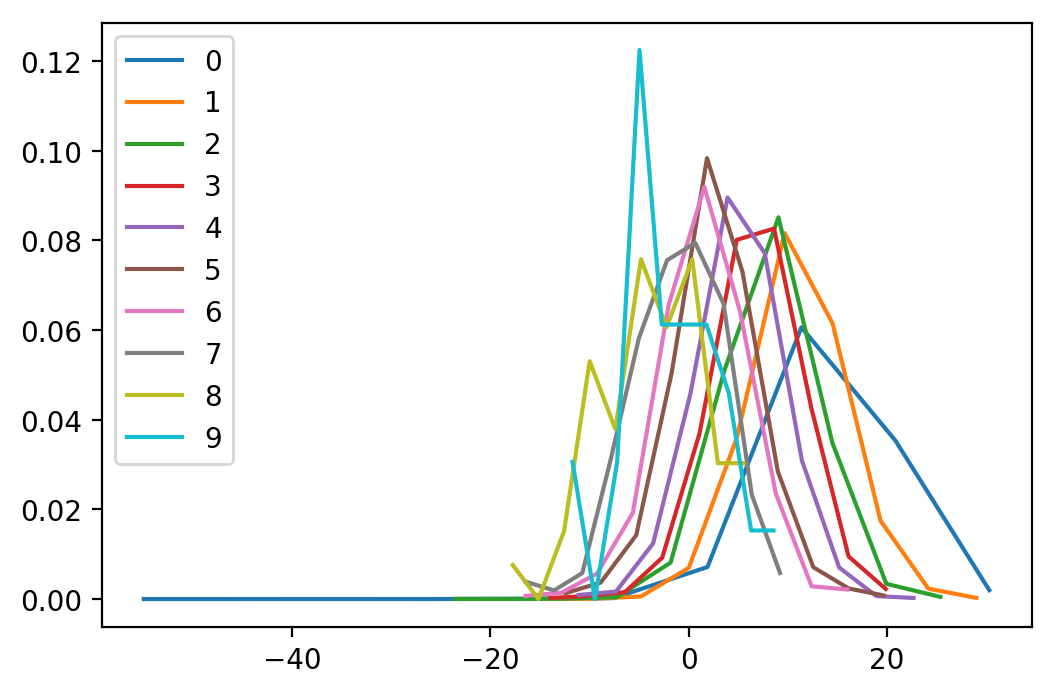

In [101]:
plt.figure(dpi = 200)
for key in meanScoreStatistics.keys():
    hist, bin_edges = np.histogram(geometricmeanStatistics[key], normed = True)
    plt.plot((bin_edges[:-1]+bin_edges[1:])/2, hist, label = str(key))
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until


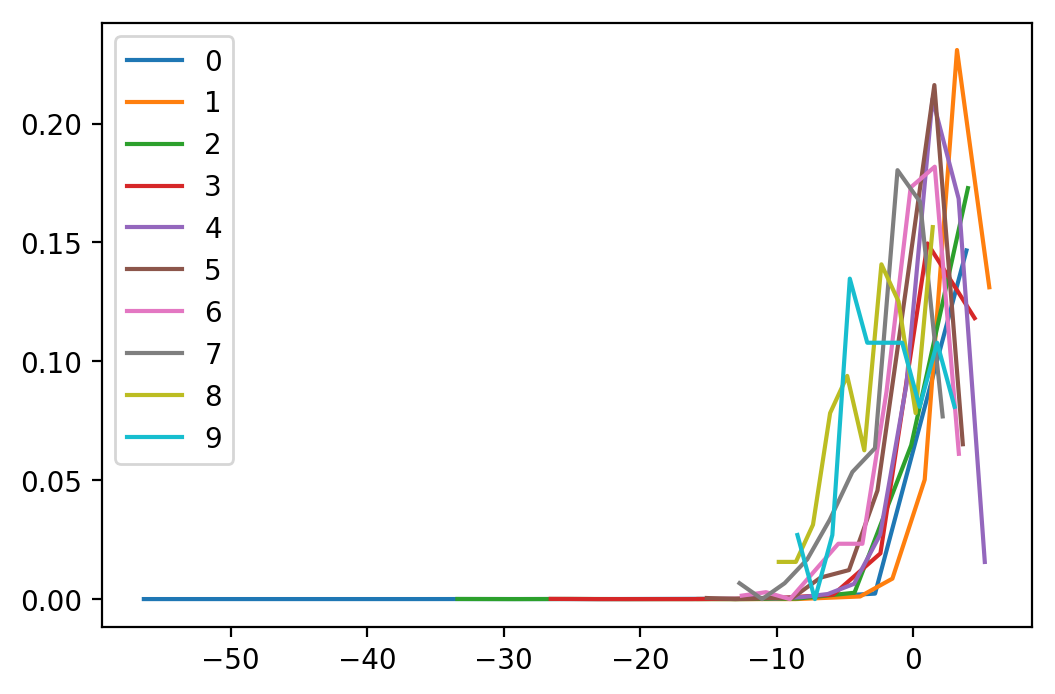

In [108]:
plt.figure(dpi = 200)
for key in minmaxScoreStatistics.keys():
    hist, bin_edges = np.histogram(minmaxScoreStatistics[key], normed = True)
    plt.plot((bin_edges[:-1]+bin_edges[1:])/2, hist, label = str(key))
plt.legend()

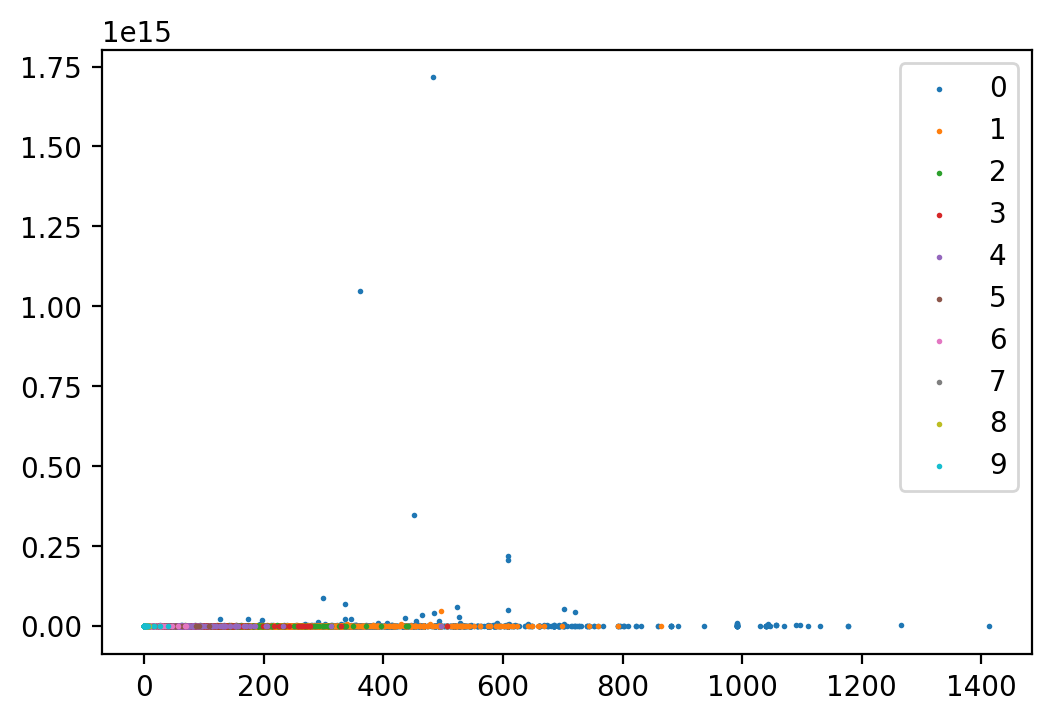

In [119]:
plt.figure(dpi = 200)
for key in minmaxScoreStatistics.keys():
    plt.scatter(minmaxScoreStatistics[key], geometricmeanStatistics[key], label = str(key), s = 1)

plt.legend()

In [172]:
mean_diff_mul = {0: [],
                1: [],
                2: [],
                3: [],
                4: [],
                5: [],
                6: [],
                7: [],
                8: [],
                9: []}
min_diff_mul = {0: [],
                1: [],
                2: [],
                3: [],
                4: [],
                5: [],
                6: [],
                7: [],
                8: [],
                9: []}
max_diff_mul = {0: [],
                1: [],
                2: [],
                3: [],
                4: [],
                5: [],
                6: [],
                7: [],
                8: [],
                9: []}

In [173]:
n = len(Y_seq_grade_merge)
for i in range(n):
    tmax = int(tmax_seq_merge[i])
    y = int(Y_seq_grade_merge[i])
    difficulties = X_seq_data_merge[i, 0:tmax, -1]
    diffi_multiply = difficulties[0:-1]*difficulties[1:]
    mean_diff_mul[y].append(np.mean(diffi_multiply))
    min_diff_mul[y].append(np.min(diffi_multiply))
    max_diff_mul[y].append(np.max(diffi_multiply))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until


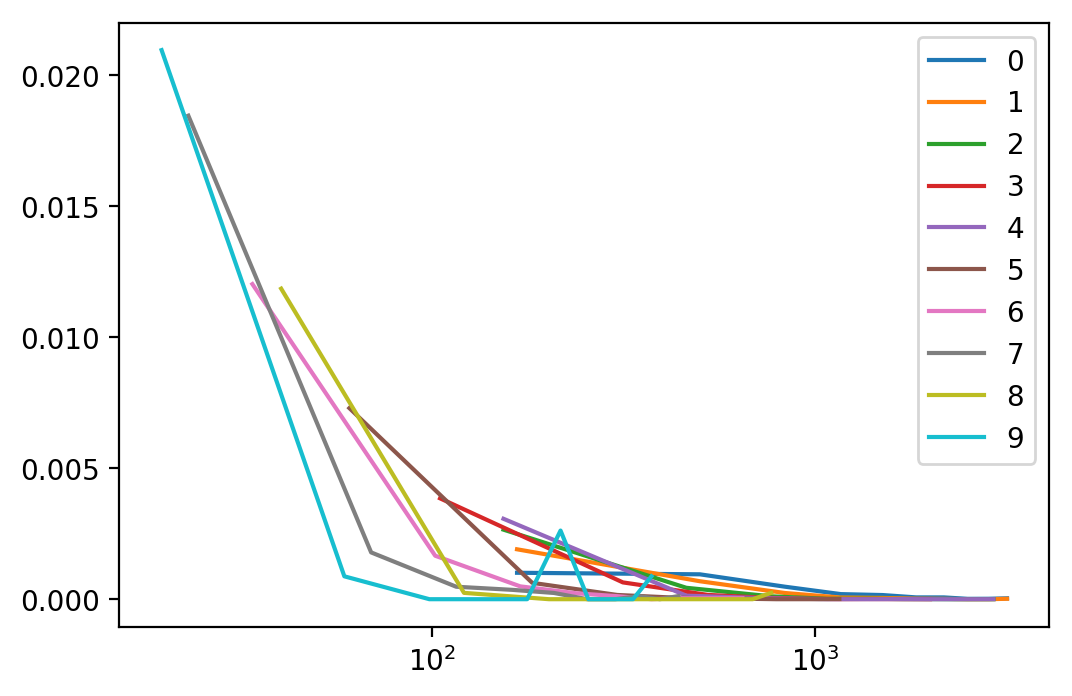

In [175]:
plt.figure(dpi = 200)
for key in mean_diff_mul.keys():
    hist, bin_edges = np.histogram(max_diff_mul[key], normed = True)
    plt.plot((bin_edges[:-1]+bin_edges[1:])/2, hist, label = str(key))
plt.legend()
plt.xscale('symlog')

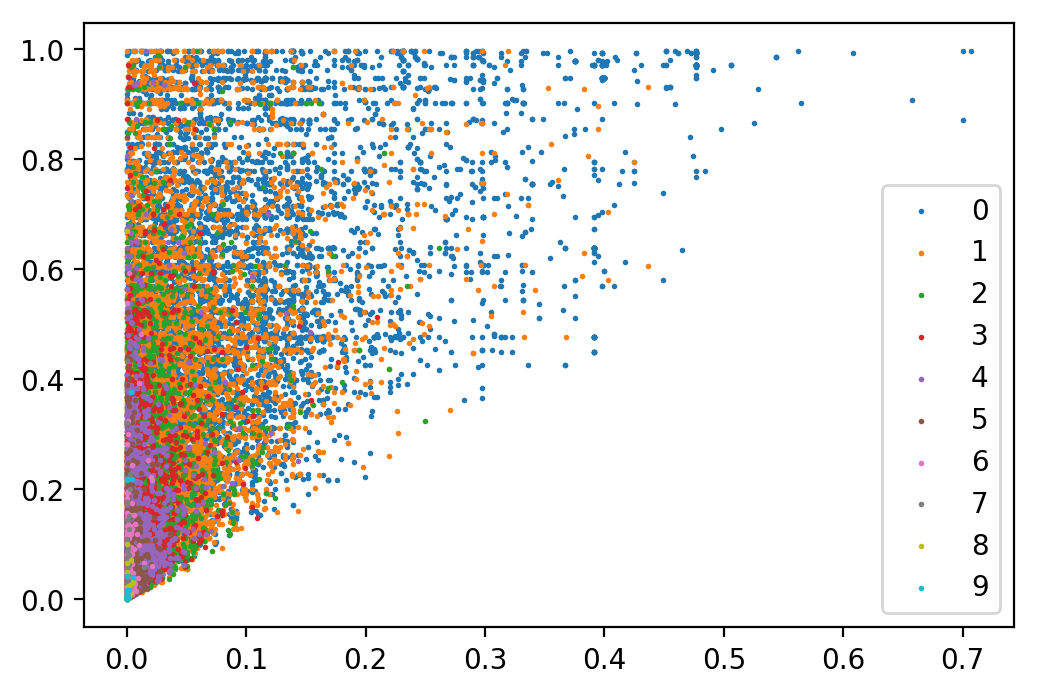

In [189]:
plt.figure(dpi = 200)
for key in mean_diff_mul.keys():
    plt.scatter(np.tanh(np.array(min_diff_mul[key])/1000), np.tanh(np.array(max_diff_mul[key])/1000), label = str(key), s = 1)

plt.legend()

### partitions

Text(0,0.5,'number count')

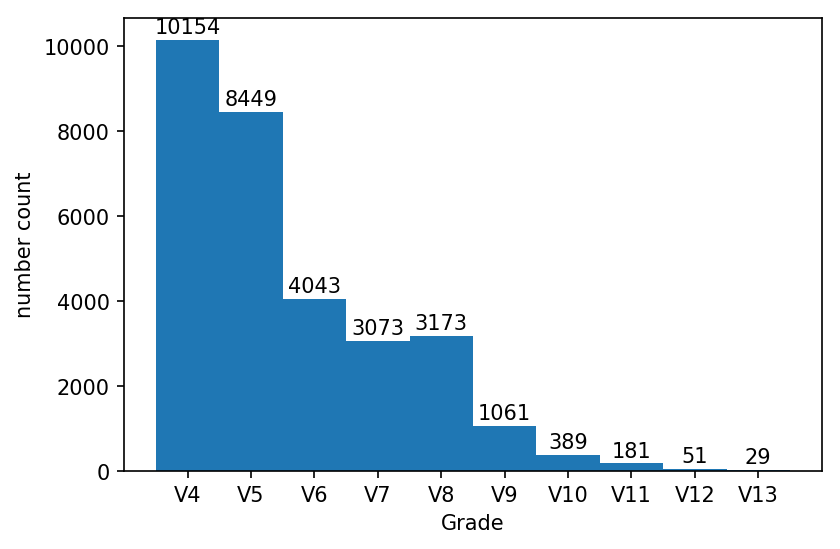

In [38]:
plt.figure(dpi = 150)
result = plt.hist(Y_seq_grade_merge, bins = np.arange(11)-0.5)
for x,y in zip(np.arange(10),result[0]):
    label = str(int(y))
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='center')
plt.xticks(np.arange(10), ['V4','V5','V6','V7','V8','V9','V10','V11','V12','V13'])
plt.xlabel('Grade')
#plt.yscale('log')
plt.ylabel('number count')

In [68]:
n_dev = 3000
n_test = 3000
n_train = n_sample - n_dev - n_test
print(n_train)

24603


In [69]:
np.random.seed(0)
shuffle = np.random.choice(np.arange(n_sample), n_sample, replace = False)

In [70]:
X_seq_shuffle = X_seq_data_merge[shuffle, :, :]
Y_seq_shuffle = Y_seq_grade_merge[shuffle]
keys_seq_shuffle = np.array(keys_seq_merge)[shuffle]
tmax_seq_shuffle = tmax_seq_merge[shuffle]

In [71]:
training_set_seq = {'X': X_seq_shuffle[0:n_train], 
                'Y': Y_seq_shuffle[0:n_train], 
                'keys': keys_seq_shuffle[0:n_train], 
                'tmax': tmax_seq_shuffle[0:n_train]}
dev_set_seq = {'X': X_seq_shuffle[n_train:n_train+n_dev], 
                'Y': Y_seq_shuffle[n_train:n_train+n_dev], 
                'keys': keys_seq_shuffle[n_train:n_train+n_dev], 
                'tmax': tmax_seq_shuffle[n_train:n_train+n_dev]}
test_set_seq = {'X': X_seq_shuffle[n_train+n_dev:], 
                'Y': Y_seq_shuffle[n_train+n_dev:],  
                'keys': keys_seq_shuffle[n_train+n_dev:], 
                'tmax': tmax_seq_shuffle[n_train+n_dev:]}

In [43]:
training_set_path = parent_wd + '/preprocessing/training_set_seq_12'
dev_set_path = parent_wd + '/preprocessing/dev_set_seq_12'
test_set_path = parent_wd + '/preprocessing/test_set_seq_12'
save_pickle(training_set_seq, training_set_path)
save_pickle(dev_set_seq, dev_set_path)
save_pickle(test_set_seq, test_set_path)

### Move based Data

In [50]:
def process_move_data(set_seq):
    total_t = int(np.sum(set_seq['tmax']))
    X_move_data_merge = np.zeros((total_t, 22))
    Y_move_grade_merge = np.zeros(total_t)
    keys_move_merge = np.zeros(total_t)
    
    i = 0
    for key in set_seq['keys']:
        X_data = X_seq_dict_merge[key].T
        tmax = X_data.shape[0]
        X_move_data_merge[i:i+tmax, :] = X_data
        Y_move_grade_merge[i:i+tmax] = Y_seq_dict_merge[key]
        keys_move_merge[i:i+tmax] = key
        i += tmax
    
    np.random.seed(0)
    shuffle = np.random.choice(np.arange(total_t), total_t, replace = False)
    
    X_move_shuffle = X_move_data_merge[shuffle, :]
    Y_move_shuffle = Y_move_grade_merge[shuffle]
    keys_move_shuffle = keys_move_merge[shuffle]
    
    set_move = {'X': X_move_shuffle, 
                'Y': Y_move_shuffle, 
                'keys': keys_move_shuffle}
    return set_move

In [51]:
training_set_move = process_move_data(training_set_seq)
dev_set_move = process_move_data(dev_set_seq)
test_set_move = process_move_data(test_set_seq)

In [75]:
n_sample = len(Y_seq_dict_merge)
total_t = int(np.sum(tmax_seq_shuffle))
X_move_data_merge = np.zeros((total_t, 22))
Y_move_grade_merge = np.zeros(total_t)
keys_move_merge = np.zeros(total_t)

i = 0
for key, value in X_seq_dict_merge.items():
    X_data = value.T
    tmax = X_data.shape[0]
    X_move_data_merge[i:i+tmax, :] = X_data
    Y_move_grade_merge[i:i+tmax] = Y_seq_dict_merge[key]
    keys_move_merge[i:i+tmax] = key
    i += tmax

Text(0,0.5,'number count')

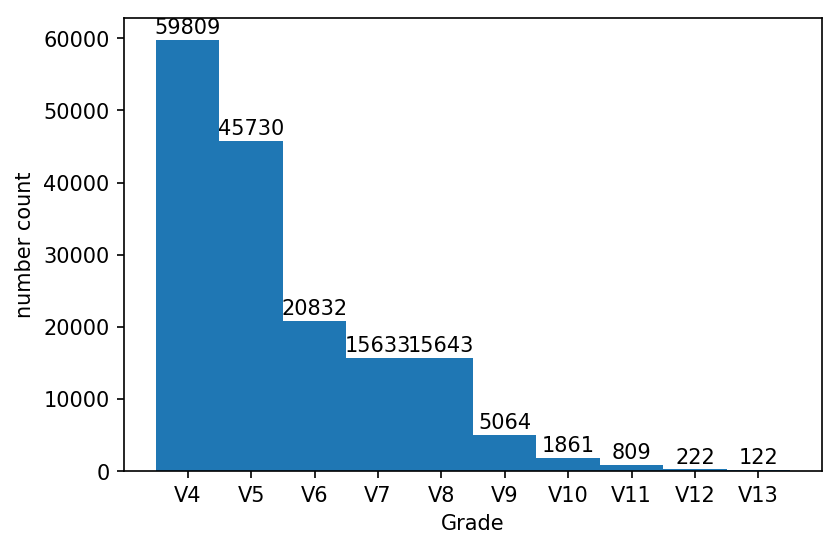

In [87]:
plt.figure(dpi = 150)
result = plt.hist(Y_move_grade_merge, bins = np.arange(11)-0.5)
for x,y in zip(np.arange(10),result[0]):
    label = str(int(y))
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='center')
plt.xticks(np.arange(10), ['V4','V5','V6','V7','V8','V9','V10','V11','V12','V13'])
plt.xlabel('Grade')
#plt.yscale('log')
plt.ylabel('number count')

In [114]:
n_sample = len(Y_move_grade_merge)
n_dev = 3000
n_test = 3000
n_train = n_sample - n_dev - n_test
print(n_train)

159725


In [115]:
np.random.seed(0)
shuffle = np.random.choice(np.arange(n_sample), n_sample, replace = False)

In [29]:
X_move_shuffle = X_move_data_merge[shuffle, :]
Y_move_shuffle = Y_move_grade_merge[shuffle]
keys_move_shuffle = keys_move_merge[shuffle]

NameError: name 'X_move_data_merge' is not defined

In [117]:
training_set_move = {'X': X_move_shuffle[0:n_train], 
                'Y': Y_move_shuffle[0:n_train], 
                'keys': keys_move_shuffle[0:n_train]}
dev_set_move = {'X': X_move_shuffle[n_train:n_train+n_dev], 
                'Y': Y_move_shuffle[n_train:n_train+n_dev], 
                'keys': keys_move_shuffle[n_train:n_train+n_dev]}
test_set_move = {'X': X_move_shuffle[n_train+n_dev:], 
                'Y': Y_move_shuffle[n_train+n_dev:],  
                'keys': keys_move_shuffle[n_train+n_dev:]}

In [92]:
training_set_path = parent_wd + '/preprocessing/training_set_move'
dev_set_path = parent_wd + '/preprocessing/dev_set_move'
test_set_path = parent_wd + '/preprocessing/test_set_move'
save_pickle(training_set_move, training_set_path)
save_pickle(dev_set_move, dev_set_path)
save_pickle(test_set_move, test_set_path)

### normalization

In [81]:
training_seq_normalized = normalization(training_set_seq)
dev_seq_normalized = normalization(dev_set_seq)
test_seq_normalized = normalization(test_set_seq)

In [82]:
training_normalized_set_path = parent_wd + '/preprocessing/training_seq_n_12_rmrp0'
dev_normalized_set_path = parent_wd + '/preprocessing/dev_seq_n_12_rmrp0'
test_normalized_set_path = parent_wd + '/preprocessing/test_seq_n_12_rmrp0'
save_pickle(training_seq_normalized, training_normalized_set_path)
save_pickle(dev_seq_normalized, dev_normalized_set_path)
save_pickle(test_seq_normalized, test_normalized_set_path)

In [90]:
training_move_normalized = normalization_move(training_set_move)
dev_move_normalized = normalization_move(dev_set_move)
test_move_normalized = normalization_move(test_set_move)

In [91]:
training_normalized_set_path = parent_wd + '/preprocessing/training_move_n_12'
dev_normalized_set_path = parent_wd + '/preprocessing/dev_move_n_12_rmrp0'
test_normalized_set_path = parent_wd + '/preprocessing/test_move_n_12_rmrp0'
save_pickle(training_move_normalized, training_normalized_set_path)
save_pickle(dev_move_normalized, dev_normalized_set_path)
save_pickle(test_move_normalized, test_normalized_set_path)

### remove problem in dev & test sets that has 0 repeat

In [72]:
dev_set_seq['X'].shape

(3000, 12, 22)

In [72]:
del_list = []
for key in dev_set_seq['keys']:
    if MoonBoard_2016_withurl[key]['repeats'] == 0:
        del_list.append(key)
for key in test_set_seq['keys']:
    if MoonBoard_2016_withurl[key]['repeats'] == 0:
        del_list.append(key)

In [77]:
del_list = []
for key in training_set_seq['keys']:
    if MoonBoard_2016_withurl[key]['repeats'] == 0:
        del_list.append(key)

In [78]:
row_rm = []
for i, key in enumerate(training_set_seq['keys']):
    if key in del_list:
        row_rm.append(i)

In [79]:
training_set_seq['X'] = np.delete(training_set_seq['X'], row_rm, 0)
training_set_seq['Y'] = np.delete(training_set_seq['Y'], row_rm)
training_set_seq['keys'] = np.delete(training_set_seq['keys'], row_rm)
training_set_seq['tmax'] = np.delete(training_set_seq['tmax'], row_rm)

Text(0,0.5,'number count')

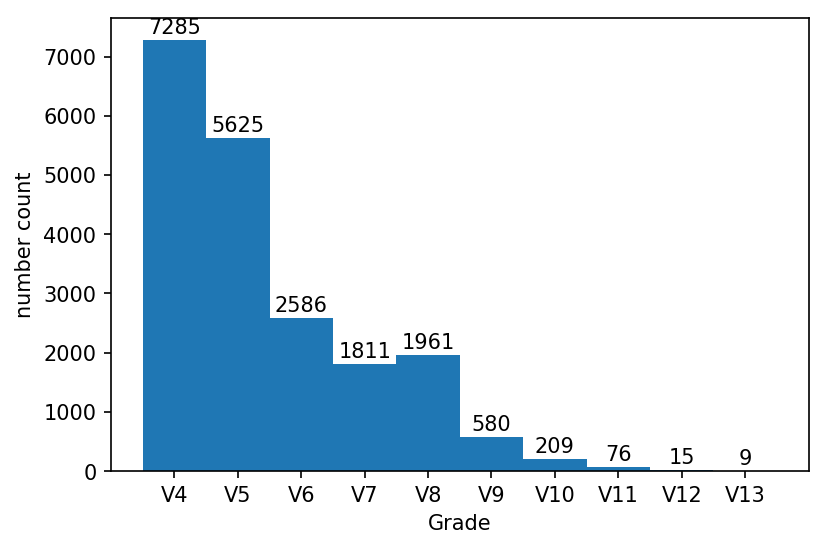

In [83]:
plt.figure(dpi = 150)
result = plt.hist(training_set_seq['Y'], bins = np.arange(11)-0.5)
for x,y in zip(np.arange(10),result[0]):
    label = str(int(y))
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='center')
plt.xticks(np.arange(10), ['V4','V5','V6','V7','V8','V9','V10','V11','V12','V13'])
plt.xlabel('Grade')
#plt.yscale('log')
plt.ylabel('number count')

In [80]:
len(training_set_seq['tmax'])

20157

In [73]:
row_rm_dev = []
for i, key in enumerate(dev_set_seq['keys']):
    if key in del_list:
        row_rm_dev.append(i)

In [74]:
dev_set_seq['X'] = np.delete(dev_set_seq['X'], row_rm_dev, 0)
dev_set_seq['Y'] = np.delete(dev_set_seq['Y'], row_rm_dev)
dev_set_seq['keys'] = np.delete(dev_set_seq['keys'], row_rm_dev)
dev_set_seq['tmax'] = np.delete(dev_set_seq['tmax'], row_rm_dev)

In [28]:
len(training_seq_normalized['tmax'])

16540

In [75]:
row_rm_test = []
for i, key in enumerate(test_set_seq['keys']):
    if key in del_list:
        row_rm_test.append(i)

In [76]:
test_set_seq['X'] = np.delete(test_set_seq['X'], row_rm_test, 0)
test_set_seq['Y'] = np.delete(test_set_seq['Y'], row_rm_test)
test_set_seq['keys'] = np.delete(test_set_seq['keys'], row_rm_test)
test_set_seq['tmax'] = np.delete(test_set_seq['tmax'], row_rm_test)

In [83]:
training_set_path = parent_wd + '/preprocessing/training_set_seq_12_rmrp0'
dev_set_path = parent_wd + '/preprocessing/dev_set_seq_12_rmrp0'
test_set_path = parent_wd + '/preprocessing/test_set_seq_12_rmrp0'
save_pickle(training_set_seq, training_set_path)
save_pickle(dev_set_seq, dev_set_path)
save_pickle(test_set_seq, test_set_path)

In [84]:
training_set_move = process_move_data(training_set_seq)
dev_set_move = process_move_data(dev_set_seq)
test_set_move = process_move_data(test_set_seq)